In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
cols=["Data","bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","Seasons","Holiday","functional"]
df=pd.read_csv("SeoulBikeData.csv",names=cols)

In [ ]:
df.head()

,Data,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,Seasons,Holiday,functional
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df=pd.read_csv("SeoulBikeData.csv",names=cols).drop(["Data","Holiday","Seasons"],axis=1)

In [ ]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df['functional']=(df['functional']=="Yes").astype(int)
df=df.drop(["hour"],axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


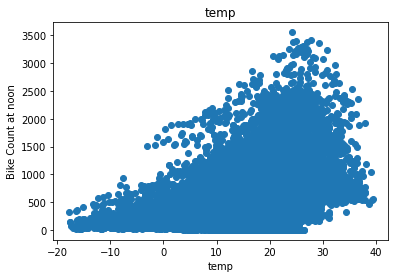

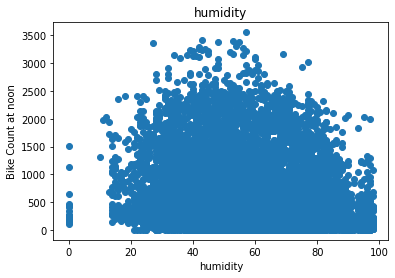

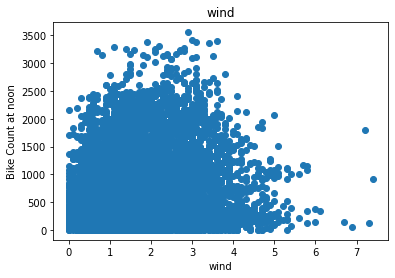

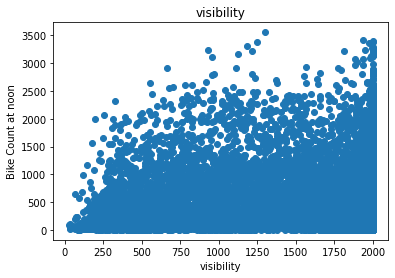

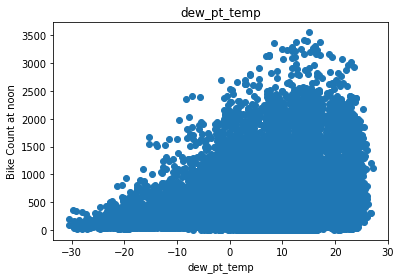

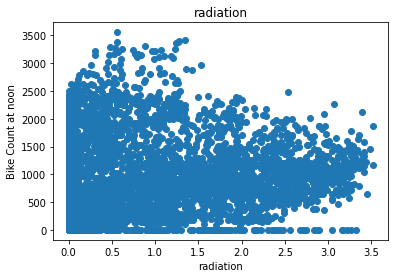

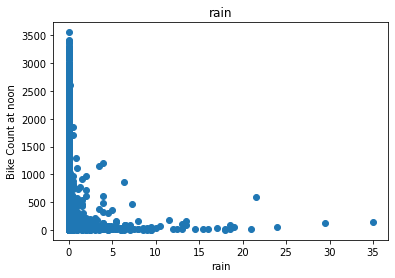

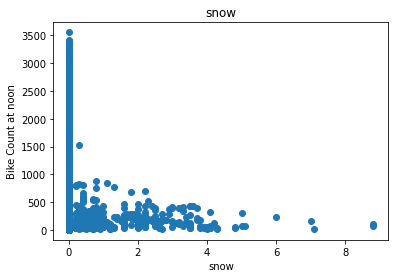

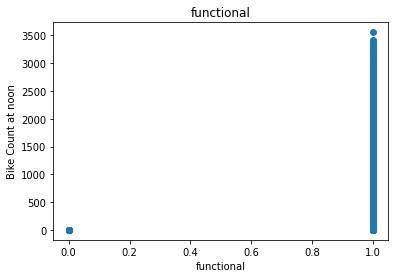

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at noon")
  plt.xlabel(label)
  plt.show()

In [ ]:
df=df.drop(["wind","visibility","functional"],axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


Train/valid/test dataset

In [ ]:
train, valid, test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe,y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if  x_labels is None:
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      X=dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X=dataframe[x_labels].values
  y=dataframe[y_label].values.reshape(-1, 1)
  data=np.hstack((X,y))

  return data, X, y

In [ ]:
_, x_train_temp, y_train_temp=get_xy(train, "bike_count", x_labels=["temp"])
_, x_valid_temp, y_valid_temp=get_xy(valid, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp=get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
x_train_temp

array([[23. ],
       [-0.9],
       [15.7],
       ...,
       [ 2.7],
       [32. ],
       [28. ]])

In [ ]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_,temp_reg.intercept_)

[[28.35491137]] [337.00878094]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.27905346398093944

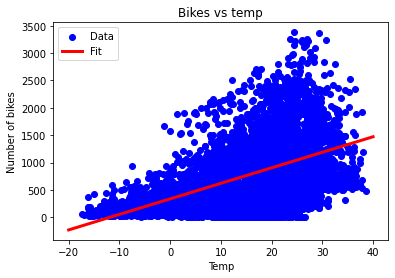

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

Multiple Linear regression


In [ ]:
_, x_train_all, y_train_all=get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_valid_all, y_valid_all=get_xy(valid, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all=get_xy(test, "bike_count", x_labels=df.columns[1:])

In [ ]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all,y_test_all)

0.38254433584236913

In [ ]:
all_reg.predict(x_test_all)

array([[ 365.35867669],
       [1598.21639581],
       [ 594.37151012],
       ...,
       [ 662.07886192],
       [ 438.56322213],
       [  25.68320986]])

Regression with Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [ ]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [ ]:
history=temp_nn_model.fit(x_train_temp.reshape(-1), y_train_temp, epochs=1000, validation_data=(x_valid_temp, y_valid_temp),verbose=0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

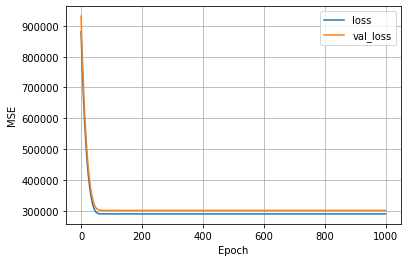

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


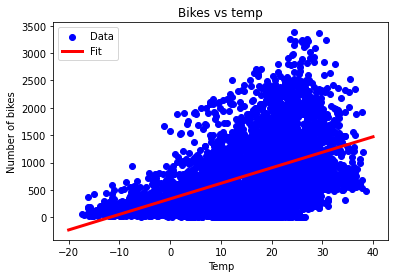

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
history=nn_model.fit(x_train_temp, y_train_temp, validation_data=(x_valid_temp, y_valid_temp), verbose=0, epochs=100)

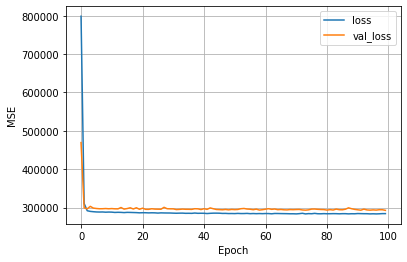

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


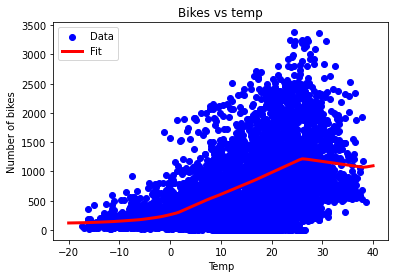

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

for multiple regression

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(x_train_all)

In [ ]:
all_nn_model=tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [ ]:
history=all_nn_model.fit(x_train_all, y_train_all, validation_data=(x_valid_all, y_valid_all), verbose=0, epochs=100)

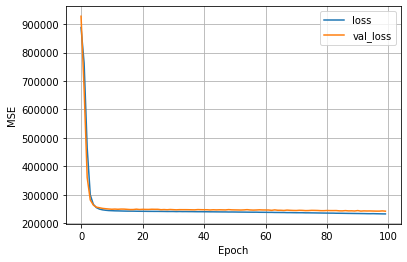

In [ ]:
plot_loss(history)

In [ ]:
# calculate the MSE for both linear reg and nn
y_pred_lr=all_reg.predict(x_test_all)
y_pred_nn=all_nn_model.predict(x_test_all)

55/55 [==============================] - 0s 3ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred-y_real)).mean()


In [ ]:
MSE(y_pred_lr, y_test_all)

262170.9905769081

In [ ]:
MSE(y_pred_nn, y_test_all)

244913.61686572904

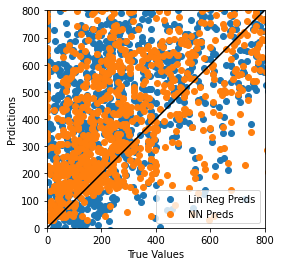

In [ ]:
ax=plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Prdictions")
lims=[0,800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_= plt.plot(lims, lims, c='black')